<a href="https://colab.research.google.com/github/GustavFredrikson/Statistical-Machine-Learning/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import pandas as pd
import numpy as np
import sklearn.model_selection as skl_ms
import sklearn.discriminant_analysis as skl_da


In [33]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

# Firstly using LDA and QDA with train test split 80% training 20% testing

In [34]:
train_1, test_1 = skl_ms.train_test_split(train, train_size=0.8, random_state=1)

y_train = train_1["Lead"]
x_train = train_1.drop(columns=["Lead"])
x_test = test_1.drop(columns=["Lead"])
y_test = test_1["Lead"]

In [35]:
model = skl_da.LinearDiscriminantAnalysis()
preds = model.fit(x_train, y_train)
print(f"Using LDA: \n Accuracy on train data: \t {preds.score(x_train, y_train)}")
print(f" Accuracy on test data: \t {preds.score(x_test, y_test)} \n\n")

Using LDA: 
 Accuracy on train data: 	 0.8628158844765343
 Accuracy on test data: 	 0.8894230769230769 




In [36]:
model = skl_da.QuadraticDiscriminantAnalysis()
preds = model.fit(x_train, y_train)

print(f"Using QDA: \n Accuracy on train data: \t {preds.score(x_train, y_train)}")
print(f" Accuracy on test data: \t {preds.score(x_test, y_test)}")

Using QDA: 
 Accuracy on train data: 	 0.8844765342960289
 Accuracy on test data: 	 0.8509615384615384


# Implement using kfold 5 folds



Mean LDA on test data: 86.8%
Mean QDA on test data: 85.7%



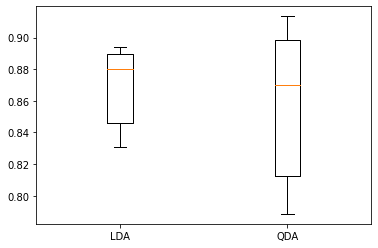

In [37]:
import statistics
import matplotlib.pyplot as plt

X = train.drop(columns=["Lead"])
y = train["Lead"]


kf = skl_ms.KFold(n_splits=5)

scores = {"LDA": [], "QDA": []}
for train_idx, test_idx in kf.split(train):
    x_train, x_val = X.iloc[train_idx,:], X.iloc[test_idx,:]
    y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]
    
    scores["LDA"].append(skl_da.LinearDiscriminantAnalysis().fit(
        x_train, y_train).score(x_val, y_val))
    scores["QDA"].append(skl_da.QuadraticDiscriminantAnalysis().fit(
        x_train, y_train).score(x_val, y_val))

print(f"Mean LDA on test data: {round(statistics.mean(scores['LDA'])*100, 1)}%")
print(f"Mean QDA on test data: {round(statistics.mean(scores['QDA'])*100, 1)}%\n")

plt.boxplot([scores["LDA"], scores["QDA"]])
plt.xticks([1,2], ["LDA", "QDA"])
plt.show()